In [1]:
# Import Libs
import time
init_time = time.time()

import os
import pickle
import numpy as np
import ROOT

from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 20

current_time = time.time()
print 'Time to import libraries: %1.3f seconds'%(current_time-init_time)


Time to import libraries: 5.935 seconds


In [2]:
# Import Libs
import time
init_time = time.time()

import os
import pickle
import numpy as np
import ROOT

from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

In [4]:
import ROOT


# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kRed+1) # For Signal
list_color.append(ROOT.kGreen+4) # For Bkg
list_color.append(ROOT.kGreen+3) # For Bkg
list_color.append(ROOT.kGreen+2) # For Bkg
list_color.append(ROOT.kGreen-5) # For Bkg
list_color.append(ROOT.kGreen-8) # For Bkg
list_color.append(ROOT.kOrange+1) # For Bkg
list_color.append(ROOT.kGray+4) # For Bkg
list_color.append(ROOT.kGray+1) # For Bkg
list_color.append(ROOT.kGray+2) # For Bkg

#  Make a list of mass histogram
list_inf_M = []

hist_inf = HistogramFunctions.OneDimHistInfo("Signal Relative Pt ","h_lvbb_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)


hist_inf = HistogramFunctions.OneDimHistInfo("Bkg Wbb Relative Pt ","h_Wbb_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg Wbl Relative Pt ","h_Wbl_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg Wcc Relative Pt ","h_Wcc_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg Wcl Relative Pt ","h_Wcl_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg Wll Relative Pt ","h_Wll_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg TTbar Relative Pt ","h_TTbar_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg WW Relative Pt ","h_WW_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg WZ Relative Pt ","h_WZ_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Bkg ZZ Relative Pt","h_ZZ_PtRel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf_M.append(hist_inf)

list_hist_M = HistogramFunctions.CreateListOf1DHistograms(list_inf_M,list_color)
c = rootnotes.canvas("c", (800, 600))
d = rootnotes.canvas("d", (800, 600))

list_hist_M

[<ROOT.TH1F object ("h_lvbb_PtRel") at 0x2bc00f0>,
 <ROOT.TH1F object ("h_Wbb_PtRel") at 0x2b8fd40>,
 <ROOT.TH1F object ("h_Wbl_PtRel") at 0x22214e0>,
 <ROOT.TH1F object ("h_Wcc_PtRel") at 0x314c4b0>,
 <ROOT.TH1F object ("h_Wcl_PtRel") at 0x2b86420>,
 <ROOT.TH1F object ("h_Wll_PtRel") at 0x222e9d0>,
 <ROOT.TH1F object ("h_TTbar_PtRel") at 0x2214ca0>,
 <ROOT.TH1F object ("h_WW_PtRel") at 0x22279c0>,
 <ROOT.TH1F object ("h_WZ_PtRel") at 0x2b9fc80>,
 <ROOT.TH1F object ("h_ZZ_PtRel") at 0x311c840>]

In [62]:
list_hist_M

[<ROOT.TH1F object ("h_lvbb_M") at 0x7436510>,
 <ROOT.TH1F object ("h_ZZ_M") at 0x7436a30>,
 <ROOT.TH1F object ("h_TTbar_M") at 0xa19a920>]

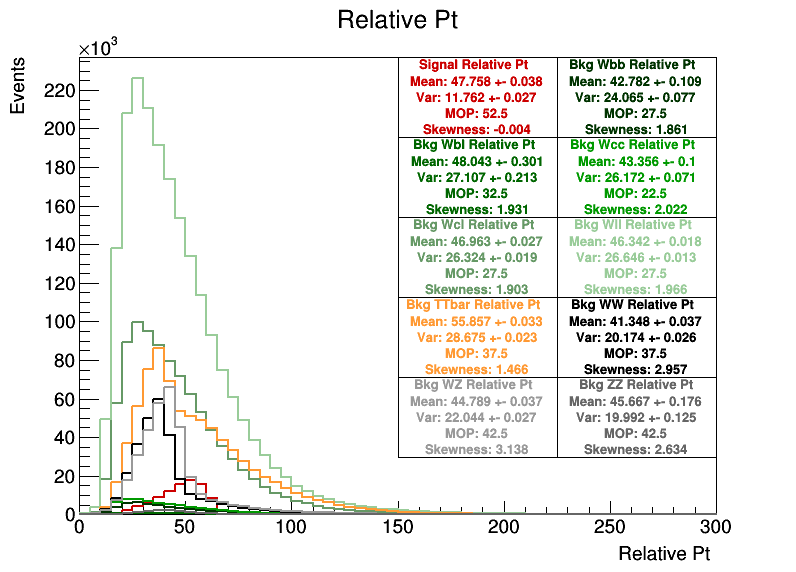

In [5]:
from sklearn.externals import joblib
#Use ROOT in order to create a numpy array with selected variables


processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
#processes = "lvbb125,ZZ,TTbar"
output_path = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results"

data_path = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet"

for process in processes.split(","):
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    nrEvents = tree.GetEntries()
    #nrEvents = 95000

    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
                
        #=============================================================================
        #=======================EMJESGSCMu========================================
        # variables for EMJESGSCMu j1.     
        E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
        Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
        Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
        Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
        # variables for EMJESGSCMu j2.     
        E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
        Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
        Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
        Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
        # PtRel in EMJESGSCMu
        Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
        Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
        norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)
    
        Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
        Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
        norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
        # sum of components.
        Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
        norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
        numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
        angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
        #compute Relative Pt
        PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
    
        #==========================
        #==========================
            
        if process == 'lvbb125': 
                
            list_hist_M[0].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'Wbb':
            list_hist_M[1].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'Wbl':
            list_hist_M[2].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'Wcc':
            list_hist_M[3].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'Wcl':
            list_hist_M[4].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'Wll':
            list_hist_M[5].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'TTbar':
            list_hist_M[6].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'WW':
            list_hist_M[7].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'WZ':
            list_hist_M[8].Fill(PtRel_j1_EMJESGSCMu)
        if process == 'ZZ':
            list_hist_M[9].Fill(PtRel_j1_EMJESGSCMu)
                
clone_list_M = []
for hist in list_hist_M:
    newhist = hist.Clone()
    clone_list_M.append(newhist)
    
#HistogramFunctions.Draw1DHists(list_hist_M,output_path)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_M, "Relative Pt", " Relative Pt ", "Events", c)        

c

In [6]:
c.Print(output_path+'/plot_junto_encontro_fisica.pdf')

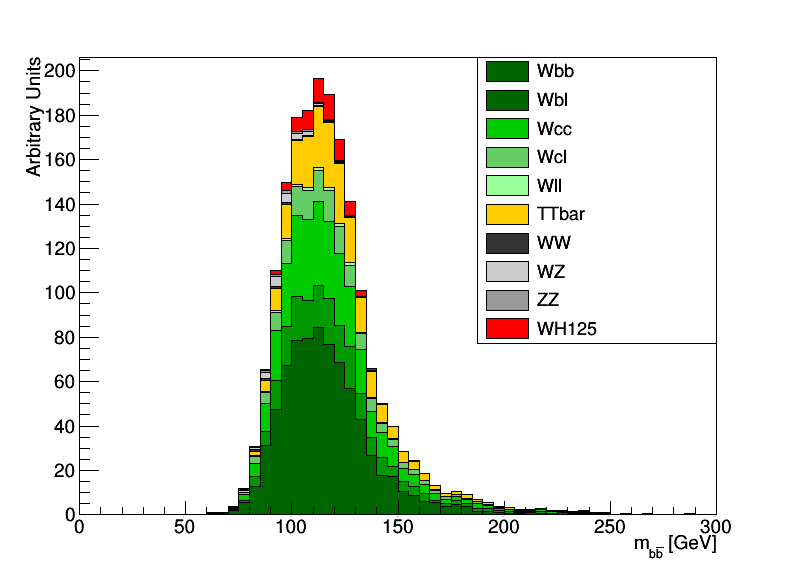

In [25]:
q = rootnotes.canvas("k", (800, 600))
#ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hs = ROOT.THStack('hs',"")
leg = ROOT.TLegend(0.9,0.4,0.6,0.9)

clone_list_M[1].SetFillStyle(200)
clone_list_M[1].SetFillColor(ROOT.kNone)
clone_list_M[1].SetFillColor(list_color[1])
clone_list_M[1].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[1])
leg.AddEntry(clone_list_M[1],"Wbb","f")

clone_list_M[2].SetFillStyle(200)
clone_list_M[2].SetFillColor(ROOT.kNone)
clone_list_M[2].SetFillColor(list_color[2])
clone_list_M[2].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[2])
leg.AddEntry(clone_list_M[1],"Wbl","f")

clone_list_M[3].SetFillStyle(200)
clone_list_M[3].SetFillColor(ROOT.kNone)
clone_list_M[3].SetFillColor(list_color[3])
clone_list_M[3].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[3])
leg.AddEntry(clone_list_M[3],"Wcc","f")

clone_list_M[4].SetFillStyle(200)
clone_list_M[4].SetFillColor(ROOT.kNone)
clone_list_M[4].SetFillColor(list_color[4])
clone_list_M[4].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[4])
leg.AddEntry(clone_list_M[4],"Wcl","f")

clone_list_M[5].SetFillStyle(200)
clone_list_M[5].SetFillColor(ROOT.kNone)
clone_list_M[5].SetFillColor(list_color[5])
clone_list_M[5].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[5])
leg.AddEntry(clone_list_M[5],"Wll","f")

clone_list_M[6].SetFillStyle(200)
clone_list_M[6].SetFillColor(ROOT.kNone)
clone_list_M[6].SetFillColor(list_color[6])
clone_list_M[6].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[6])
leg.AddEntry(clone_list_M[6],"TTbar","f")

clone_list_M[7].SetFillStyle(200)
clone_list_M[7].SetFillColor(ROOT.kNone)
clone_list_M[7].SetFillColor(list_color[7])
clone_list_M[7].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[7])
leg.AddEntry(clone_list_M[7],"WW","f")

clone_list_M[8].SetFillStyle(200)
clone_list_M[8].SetFillColor(ROOT.kNone)
clone_list_M[8].SetFillColor(list_color[8])
clone_list_M[8].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[8])
leg.AddEntry(clone_list_M[8],"WZ","f")

clone_list_M[9].SetFillStyle(200)
clone_list_M[9].SetFillColor(ROOT.kNone)
clone_list_M[9].SetFillColor(list_color[9])
clone_list_M[9].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[9])
leg.AddEntry(clone_list_M[9],"ZZ","f")

clone_list_M[0].SetFillStyle(200)
clone_list_M[0].SetFillColor(ROOT.kNone)
clone_list_M[0].SetFillColor(ROOT.kRed)
clone_list_M[0].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[0])
leg.AddEntry(clone_list_M[0],"WH125","f")

hs.Draw();
hs.GetXaxis().SetTitle("m_{b#bar{b}} [GeV]");
hs.GetYaxis().SetTitle("Arbitrary Units");
leg.Draw();
#//hs->GetXaxis()->SetRangeUser(50.,150.);
#gPad.Modified();
q.Print(output_path+'/stacked_ENFPC.pdf')
q

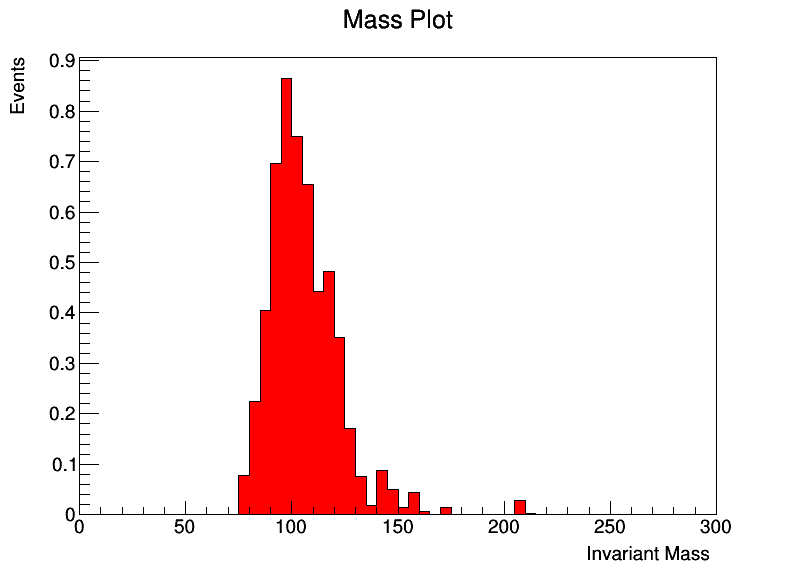

In [35]:
q = rootnotes.canvas("k", (800, 600))
#ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)
clone_list_M[1].SetFillStyle(200)
clone_list_M[1].SetFillColor(ROOT.kNone)
clone_list_M[1].SetFillColor(ROOT.kRed)
clone_list_M[1].Draw()
q

In [9]:
c.Print(output_path+'/predictPlot.pdf')
print list_hist_M[0].GetEntries()
print list_hist_M[1].GetEntries()

64587.0
4948.0
